In [15]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
wine = load_wine()

In [64]:
X=wine['data']
y=wine['target']

In [65]:
X.shape

(178, 13)

In [66]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

몇개의 군집이 정확도가 높은지


In [67]:
scaler = MinMaxScaler()
X= scaler.fit_transform(X)
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [68]:
best_n = 1
best_score = -1
for n_cluster in range (2,11):
    kmeans = KMeans(n_clusters = n_cluster)
    kmeans.fit(X)
    cluster = kmeans.predict(X)
    score = silhouette_score(X,cluster)
    print(n_cluster,score)

2 0.49266925641587767
3 0.5680591392935428
4 0.4901590386140555
5 0.4308097033806566
6 0.41862734465156226
7 0.4021431817496418
8 0.3960427491046304
9 0.38938681296510624
10 0.3981959428805766


In [69]:
kmeans =KMeans(n_clusters = 3)
kmeans.fit(X)
cluster = kmeans.predict(X)


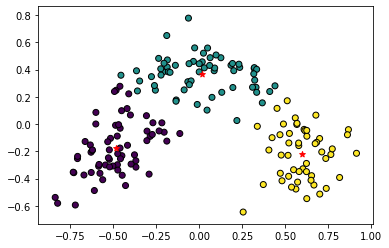

In [70]:
plt.scatter(X[:,0],X[:,1],c=cluster, linewidth = 1, edgecolors = 'black')
plt.scatter(-0.48503975, -0.17742871, c = 'r', marker='*' )
plt.scatter(0.59750634, -0.21895939, c='r', marker='*')
plt.scatter(0.01701227,  0.36612572, c='r', marker='*')
kmeans.cluster_centers_
plt.show()


In [71]:
cluster 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

보고서

1. 코드 설명 :  kmeans clustering기법을 사용하였으며 MinMaxScaler를 통해 0~1값을 갖도록 하였고 PCA를 이용하여 13차원을 2차원으로 줄여 2차원상에 군집이 표현되기 쉽게 하였다. kmeans에 군집 수를 결정하기 전에 실루엣 점수를 이용하여 가장 높은 점수를 받은 군집수인 3으로 정했고 kmeans에 적용하여 위와 같은 결과가 나왔다,
2. 본문 :
결과는 64, 63 , 51개 즉 cluster 을 보면 0이 약 64개, 2가 63개 1이 51개로 분류 되었다.
y값을 살펴보면 (59개,71개, 48개)로 분류 되었다. 클러스터링 특성상 label을 제외했을때 비슷한 특성 즉 클러스터링 기법을 kmeans을 사용하여 분리했기 때문에 중심점 3개로 부터의 거리를 통해 분류를 하였다. 중심점은 (-0.48, -0.177), (0.59,-0.21), (0.01,0.36) 으로 실제로 중심점을 기점으로 데이터들이 모여있는 양상임을 확인 할 수 있다. 
코드에서 MinMaxScaler를 사용했는데 그 이유는 data의 13번째 항이 다른 값에 비해 너무 커서인지 제대로 된 군집을 형성하지 못하여 중요한 것은 kmeans를 사용하여 얻는 중심점과의 거리이므로 범위를 0~1로 설정해도 상관 없다 생각하여 코딩하였다. 또한 2차원으로 13차원을 표현하기 힘들기 때문에 PCA를 통해 차원수를 2차원으로 줄여서 표현하였다. 
kmeans를 사용하여 군집한 결과인 cluster과 y값을 비교해 보면 얼추 비슷 하지만 7개 정도 제대로 분류를 하지 못하였는데 kmeans의 특성상 초기 군집의 중심으로 부터 임의의 객체를 선택한다음 자료들의 평균으로 군집의 중심점을 구하는 방식인지라 kmeans만으로는 한계가 있는것 같다. 또한 kmeans가 간단한 클러스터링이라는 장점이 있지만 군집의 개수를 직접 설정해야 하고 군집의 수에 따라 정확도가 달라져서 적절한 군집의 개수를 알아야 한다는 단점이 있다. 그것을 위해 실루엣 스코어를 사용하였고 2개에서 10개의 군집중 실루엣 점수가 그나마 높은 3개를 하였다. 실루엣 스코어가 높다고 정확도가 높은것은 아니지만 얼추 맞다고 생각한다.
3.결론
결과는(64, 63, 51)(개) 이론값:(59, 71,48)(개) 약 7개의 데이터가 제대로 된 분류를 하지 못하였다.